In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.shape

(200000, 202)

In [3]:
import matplotlib as plt

train['var_0'].hist(bins = 100)

,0
0,0.8091
1,-0.3503
2,2.2608
3,-0.8718
4,-0.8393


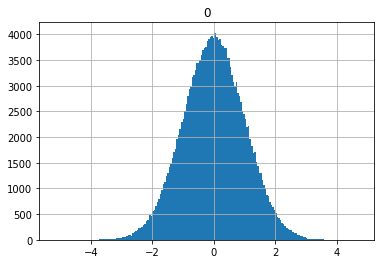

In [264]:
rand_data = np.random.normal(size=200000)
rand_df = pd.DataFrame(rand_data)
rand_df = round(rand_df,4)
rand_df.hist(bins = 200)
rand_df.head()

In [279]:

#col = rand_df[0]
col = train['var_0']


num_list = col.value_counts()
list_summary = num_list.describe()
ul3 = num_list.std()*4 + num_list.mean()
print('Mean: ',round(num_list.mean(),1))
print('Upper 4 std above mean: ',round(ul3,1))

df = num_list.value_counts()

col_min = col.values.min()
col_max = col.values.max()
col_range = col_max - col_min

print('Min: ',col_min,'    Max: ', col_max,'    Range: ', col_range)

df = df.rename_axis('Occurances').reset_index(name='Counts')

count_sum = df['Counts'].sum()
row_count = len(train.index)
print('Total different unique values: ',count_sum, '    % of Total: ',count_sum/row_count*100)
df['%'] = df['Counts']/count_sum*100
df['cumsum'] =df['%'].cumsum()
print(df)


Mean:  2.1
Upper 4 std above mean:  7.3
Min:  0.4084     Max:  20.315     Range:  19.9066
Total different unique values:  94672     % of Total:  47.336
    Occurances  Counts          %      cumsum
0            1   40355  42.626120   42.626120
1            2   25627  27.069250   69.695369
2            3   15220  16.076559   85.771928
3            4    7791   8.229466   94.001394
4            5    3544   3.743451   97.744845
5            6    1397   1.475621   99.220466
6            7     526   0.555603   99.776069
7            8     145   0.153160   99.929229
8            9      50   0.052814   99.982043
9           10      14   0.014788   99.996831
10          11       3   0.003169  100.000000


In [281]:
df2 = pd.DataFrame({'Var': [], 'Range': [], 'Unique % of Total': [],
                    'Mean Count': [],'Std Count': [],'4Std UL':[],
                    'cumsum count 1': [],
                   'cumsum count 2': [],
                   'cutoff': [],
                   'data points to drop': []})
for i in range(10):
    v = 'var_'
    var_x = v+str(i)
    col =train[var_x]
    col_min = col.values.min()
    col_max = col.values.max()
    col_range = col_max - col_min
    
    num_list = col.value_counts()
    list_summary = num_list.describe()
    ul3 = num_list.std()*3 + num_list.mean()
    df = num_list.value_counts()
    df = df.rename_axis('Occurances').reset_index(name='Counts')
    count_sum = df['Counts'].sum()
    row_count = len(train.index)
    df['%'] = df['Counts']/count_sum
    df['cumsum'] =df['%'].cumsum()

    cutoff = round(num_list.mean()+4*num_list.std(),0)
    
    df2 = df2.append({'Var': var_x, 
                      'Range': round(col_range,2), 
                      'Unique % of Total': round(count_sum/row_count*100,2),
                      'Mean Count': round(num_list.mean(),1),
                      'Std Count': round(num_list.std(),1),
                      '4Std UL': round(num_list.mean()+4*num_list.std(),2),
                     'cumsum count 1': round(df.iloc[0,3]*100,2),
                     'cumsum count 2': round(df.iloc[1,3]*100,2),
                      'cutoff': cutoff,
                     'data points to drop': df.iloc[int(cutoff)-1,1] },
                     ignore_index=True)
    
print(df2.head())

     Var  Range  Unique % of Total  Mean Count  Std Count  4Std UL  \
0  var_0  19.91              47.34         2.1        1.3     7.34   
1  var_1  25.42              54.47         1.8        1.1     6.16   
2  var_2  17.24              43.28         2.3        1.5     8.11   
3  var_3  13.23              37.30         2.7        1.7     9.33   
4  var_4  11.60              31.76         3.1        2.0    11.06   

   cumsum count 1  cumsum count 2  cutoff  data points to drop  
0           42.63           69.70     7.0                526.0  
1           50.20           78.36     6.0                664.0  
2           37.78           64.16     8.0                272.0  
3           30.14           54.40     9.0                201.0  
4           24.45           45.34    11.0                 70.0  


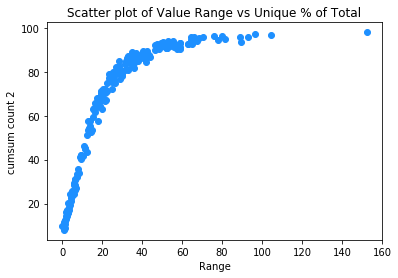

In [203]:
import matplotlib.pyplot as plt
plt.scatter(df2['Range'],df2['cumsum count 2'],c="dodgerblue")
plt.title('Scatter plot of Value Range vs Unique % of Total')
plt.xlabel('Range')
plt.ylabel('cumsum count 2')
plt.show()

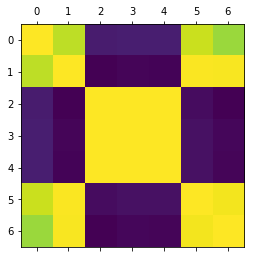

In [208]:
df2.corr()
plt.matshow(df2.corr())
plt.show()